# Sprint20課題 セグメンテーション


## 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。

[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)

GPU環境での学習

大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。

新たなデータセットの適用

Sprint18,19と同様に実装で用意されたものとは異なるデータセットを入力します。

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.91 MiB | 39.58 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [0]:
%cd /content/unet

/content/unet


In [0]:
!python main.py

Using TensorFlow backend.
W0722 23:21:53.094277 140121229416320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 23:21:53.105943 140121229416320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 23:21:53.108052 140121229416320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0722 23:21:53.131828 140121229416320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0722 23:21:53.201

In [0]:
#画像を表示させる
import glob
dir_str = "/content/unet/data/membrane/test"
imgs = glob.glob(dir_str + '/*' + '.png')

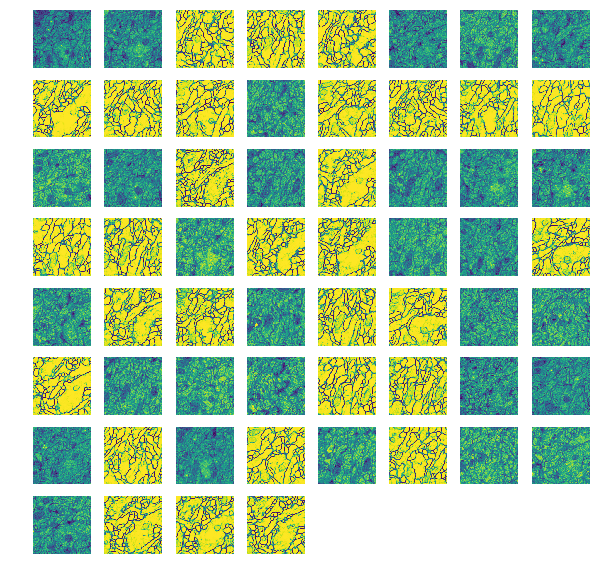

In [0]:
from matplotlib import pyplot as plt
import cv2
import re
from PIL import Image
import numpy as np

height = 256
width = 256
img_array = np.empty((0, height, width))
n_imgs = len(imgs)


plt.figure(figsize=(10, 10))
for itr, img in enumerate(imgs):
        #if re.search('predict', img):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width)
        img_array = np.append(img_array, img_tensor, axis=0)

for itr, img in enumerate(img_array):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

[TGS Salt Identification Challenge](https://www.kaggle.com/c/tgs-salt-identification-challenge)
でやってみる

In [0]:
!mkdir /root/kaggle
!mv /root/kaggle /root/.kaggle

In [0]:
!mv /content/drive/My\ Drive/kaggle.json /content

In [0]:
!mv /content/kaggle.json /root/.kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
%cd /content

/content


In [0]:
!kaggle competitions download -c tgs-salt-identification-challenge 

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 45.3MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 82.2MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 60.6MB/s]
 99% 161M/163M [00:00<00:00, 202MB/s]
100% 163M/163M [00:00<00:00, 212MB/s]
 98% 37.0M/37.9M [00:00<00:00, 165MB/s]
100% 37.9M/37.9M [00:00<00:00, 185MB/s]


In [0]:
!unzip /content/data/train.zip -d train

Archive:  /content/data/train.zip
   creating: train/images/
   creating: train/masks/
  inflating: train/images/8d08955cdf.png  
  inflating: train/images/e045664b46.png  
  inflating: train/images/4989c6509e.png  
  inflating: train/images/fff4eb4941.png  
  inflating: train/images/3a310860a3.png  
  inflating: train/images/7a696bb878.png  
  inflating: train/images/8d3ee9356b.png  
  inflating: train/images/213e0a9f7b.png  
  inflating: train/images/78f17697f2.png  
  inflating: train/images/bd20d18369.png  
  inflating: train/images/de08c5a3b7.png  
  inflating: train/images/f06ef6c8b7.png  
  inflating: train/images/b2d02516e1.png  
  inflating: train/images/5edb37f5a8.png  
  inflating: train/images/b1f0e104f5.png  
  inflating: train/images/40e8e14e60.png  
  inflating: train/images/6e1444d88d.png  
  inflating: train/images/f342603c76.png  
  inflating: train/images/7ba58ee1be.png  
  inflating: train/images/14a89a1840.png  
  inflating: train/images/4319885cf1.png  
  inflatin

In [0]:
!unzip /content/data/test.zip -d test

Archive:  /content/data/test.zip
   creating: test/images/
  inflating: test/images/8cf16aa0f5.png  
  inflating: test/images/23012be6b7.png  
  inflating: test/images/9e46a3352e.png  
  inflating: test/images/8016056c46.png  
  inflating: test/images/a490a68472.png  
  inflating: test/images/cf19041b8e.png  
  inflating: test/images/a5c02f60cd.png  
  inflating: test/images/631cec82b9.png  
  inflating: test/images/bffa15aaa5.png  
  inflating: test/images/31e17c9459.png  
  inflating: test/images/b695427db8.png  
  inflating: test/images/57b062d234.png  
  inflating: test/images/1705ade299.png  
  inflating: test/images/f1a3d6352e.png  
  inflating: test/images/99e331e803.png  
  inflating: test/images/d343f6974e.png  
  inflating: test/images/068f7a5267.png  
  inflating: test/images/d4c235a41e.png  
  inflating: test/images/bf56f7dd40.png  
  inflating: test/images/6b8b1e7ad6.png  
  inflating: test/images/c268afb4a1.png  
  inflating: test/images/63ed0faeb8.png  
  inflating: test

In [0]:
%cd /content/datatest/test/images

/content/data/test


In [48]:
# test/images配下のpngファイル名を連番にする方法
#https://qiita.com/NoName/items/fc59849ce7d497a7571a
!ls /content/test/images/*.png | awk '{printf "mv %s /content/test/images/%s.png\n",$0,NR-1}' | sh

mv /content/test/images/0005bb9630.png /content/test/images/0.png
mv /content/test/images/000a68e46c.png /content/test/images/1.png
mv /content/test/images/000c8dfb2a.png /content/test/images/2.png
mv /content/test/images/000d0a5f6c.png /content/test/images/3.png
mv /content/test/images/001ef8fc87.png /content/test/images/4.png
mv /content/test/images/002124aa19.png /content/test/images/5.png
mv /content/test/images/002af5d1e8.png /content/test/images/6.png
mv /content/test/images/00323f1910.png /content/test/images/7.png
mv /content/test/images/00329dc15c.png /content/test/images/8.png
mv /content/test/images/0035c56490.png /content/test/images/9.png
mv /content/test/images/0041cb8c49.png /content/test/images/10.png
mv /content/test/images/0043a01a19.png /content/test/images/11.png
mv /content/test/images/00565e793d.png /content/test/images/12.png
mv /content/test/images/005855cd72.png /content/test/images/13.png
mv /content/test/images/005b02dd7c.png /content/test/images/14.png
mv /c

In [0]:
#predictionの画像保管用のdirを切る
!mkdir /content/test/preds

In [45]:
#main.pyの画像の参照先を変更
!cat /content/unet/main.py

from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("data/membrane/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

In [51]:
%%writefile /content/unet/main.py
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
#myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
myGene = trainGenerator(2,'/content/data/train','images','masks',data_gen_args,save_to_dir = None)



model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

#testGene = testGenerator("data/membrane/test")
testGene = testGenerator("/content/data/test/images")
results = model.predict_generator(testGene,30,verbose=1)
#saveResult("data/membrane/test",results)
saveResult("/content/data/test/preds",results)


Overwriting /content/unet/main.py


In [52]:
!cat /content/unet/main.py

from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
#myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
myGene = trainGenerator(2,'/content/data/train','images','masks',data_gen_args,save_to_dir = None)



model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

#testGene = testGenerator("data/membrane/test")
testGene = testGenerator("/content/data/test/images")
results = model.predict_generator(testGene,30,verbose=1)
#saveResult("data/membrane/test",results)
saveResult("/content

In [0]:
!python /content/unet-master/main.py

Using TensorFlow backend.
W0614 10:25:34.471705 140075521759104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 10:25:34.484234 140075521759104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 10:25:34.486621 140075521759104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0614 10:25:34.514815 140075521759104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 10:25:34.595

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

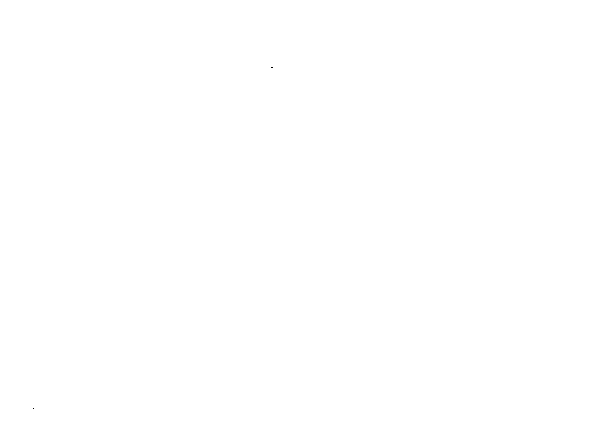

In [54]:
from matplotlib import pyplot as plt
import cv2
import re
from PIL import Image
import numpy as np
import glob

dir_str = "/content/test"
imgs_salt = glob.glob(dir_str + '/images' + '/*' + '.png')
imgs_salt_preds = glob.glob(dir_str + '/preds' + '/*' + '.png')

height = 256
width = 256
img_array_salt = np.empty((0, height, width, 3))
img_array_salt_pred = np.empty((0, height, width, 3))

n_imgs = len(imgs_salt[:10])


plt.figure(figsize=(10, 10))
for itr, img in enumerate(imgs_salt[:n_imgs]):
    #if re.search('predict', img):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width, 3)
        img_array_salt = np.append(img_array_salt, img_tensor, axis=0)
        
for itr, img in enumerate(img_array_salt):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

height = 256
width = 256
img_array = np.empty((0, height, width, 1))
n_imgs = len(imgs_salt_preds[:10])   

for itr, img in enumerate(imgs_salt_preds[:n_imgs]):
    #if re.search('predict', img):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width, 1)
        img_tensor = np.append(
            img_tensor,
            np.append(img_tensor, img_tensor, axis=3), 
            axis=3
        )
        img_array_salt_pred = np.append(img_array_salt_pred, img_tensor, axis=0)
        
        
for itr, img in enumerate(img_array_salt_pred):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

## 【問題2】コードリーディング
[論文](https://arxiv.org/pdf/1505.04597.pdf)に目を通した上で、上記実装のコードリーディングを行ってください。

model.pyの unetのdrop5までが連続的なconvolution, activation, max pooling(とDropout layer)から構成されるencodingに当たる。drop5以降は連続的なconvolution, activation,up-samplingから成るdecoderに当たる。各特徴量マップのサイズにおいて、encoderからdecoderへのcontracting pathすなわちスキップコネクションが形成され、特徴量のmergeが行われている。